In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 7.1 Geometric transformations

## Rotate about the origin
Suppose that $\mathbf{v}'$ is the vector obtained by rotating $\mathbf{v}$ by θ radians counterclockwise.
$$
\mathbf{v} = \begin{bmatrix}
x \\
y
\end{bmatrix}
\quad
\mathbf{v}' = \begin{bmatrix}
x' \\
y'
\end{bmatrix}
$$

$$
\mathbf{v}' =
\begin{bmatrix}
cos(\theta) && -sin(\theta) \\
sin(\theta) && cos(\theta)
\end{bmatrix}
\mathbf{v}
$$

***proof***

Use polar coordinate. If $\begin{bmatrix}x \\ y\end{bmatrix}=\begin{bmatrix} Rcos(\phi) \\ Rsin(\phi) \end{bmatrix}$ then

$$
\begin{align*}
\begin{bmatrix} x' \\ y' \end{bmatrix}
&= \begin{bmatrix} Rcos(\phi+\theta) \\ Rsin(\phi+\theta) \end{bmatrix} \\
&= \begin{bmatrix} Rcos(\phi)cos(\phi)−Rsin(\phi)sin(\theta) \\ Rsin(\phi)cos(\theta)+Rcos(\phi)sin(\theta)) \end{bmatrix} \\
&= \begin{bmatrix} x cos(\theta) − y sin(\theta) \\ x sin(\theta) + y cos(\theta) \end{bmatrix} \\
&= \begin{bmatrix} cos(\theta) && −sin(\theta) \\ sin(\theta) && cos(\theta) \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}
\end{align*}
$$

References:
- https://math.stackexchange.com/questions/53143/how-do-we-prove-the-rotation-matrix-in-two-dimensions-not-by-casework
- http://www.cimt.org.uk/projects/mepres/alevel/fpure_ch9.pdf

In [2]:
Rot = lambda theta: np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
R = Rot(np.pi/3)  # rotation by π/3 radians (60 degree)
R

array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]])

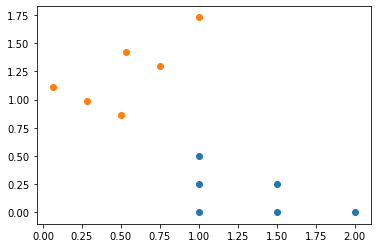

In [3]:
# create a list of 2-D points
points = np.array([[1, 0],
                   [1.5, 0],
                   [2, 0],
                   [1, 0.25],
                   [1.5, 0.25],
                   [1, 0.5]])

# Now rotate them
rpoints = np.array([R @ p for p in points])

#Show the two sets of points
plt.ion()
plt.scatter([c[0] for c in points], [c[1] for c in points])
plt.scatter([c[0] for c in rpoints],[c[1] for c in rpoints])
plt.show()

## Rotate not about the origin
A rotation through $\theta$ counterclockwise about point (a, b) can be built up in the following way:

1. translate the plane by $\begin{bmatrix} -a \\ -b \end{bmatrix}$ so that the center of rotaion is now at origin
2. rotate about new origin
3. transkate the plane back to the original position

$$
\begin{bmatrix} x' \\ y' \end{bmatrix}
=
\begin{bmatrix}
cos(\theta) && -sin(\theta) \\
sin(\theta) && cos(\theta)
\end{bmatrix}
\begin{bmatrix} x-a \\ y-b \end{bmatrix}
+
\begin{bmatrix} a \\ b \end{bmatrix}
$$

http://www.cimt.org.uk/projects/mepres/alevel/fpure_ch9.pdf

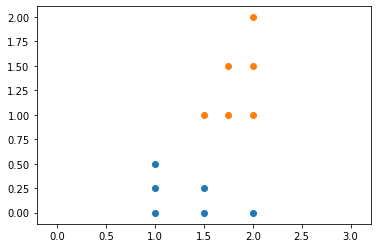

In [4]:
def rotate2d_at(arr, theta, center=[0, 0]):
    center = np.array(center)
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    new_arr = R @ (arr-center) + center
    return new_arr

# create a list of 2-D points
points = np.array([[1, 0],
                   [1.5, 0],
                   [2, 0],
                   [1, 0.25],
                   [1.5, 0.25],
                   [1, 0.5]])

# Now rotate them
rpoints = np.array([rotate2d_at(p, np.pi/2, [1, 1]) for p in points])

#Show the two sets of points
fig, ax = plt.subplots()
ax.scatter([c[0] for c in points], [c[1] for c in points])
ax.scatter([c[0] for c in rpoints],[c[1] for c in rpoints])
ax.set_aspect('equal', 'datalim')
plt.show()

## Reflection across a line of given angle
Suppose that $v'$ is the vector obtained by reflecting $v$ through the line
that passes through the origin, inclined $\theta$ radians with respect to horizontal.

$$
\mathbf{v} = \begin{bmatrix}
x \\
y
\end{bmatrix}
\quad
\mathbf{v}' = \begin{bmatrix}
x' \\
y'
\end{bmatrix}
$$
$$
\mathbf{v}' =
\begin{bmatrix}
cos(2\theta) && sin(2\theta) \\
sin(2\theta) && -cos(2\theta)
\end{bmatrix}
\mathbf{v}
$$


***proof***

Decompose reflection to three step
1. rotate an arbitrary mirror line onto the x-axis. Call this $T_1$
2. reflect across the x-axis. Call this $T_2$
3. rotate back. Call this $T_3$

$$
\begin{align*}
\begin{bmatrix} x' \\ y' \end{bmatrix}
&= T_3 T_2 T_1 \begin{bmatrix} x \\ y \end{bmatrix} \\
&= \begin{bmatrix} cos(\theta) && −sin(\theta) \\ sin(\theta) && cos(\theta) \end{bmatrix} \begin{bmatrix} 1 && 0 \\ 0 && -1 \end{bmatrix} \begin{bmatrix} cos(\theta) && sin(\theta) \\ -sin(\theta) && cos(\theta) \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} \\
&= \begin{bmatrix} cos(\theta) && sin(\theta) \\ sin(\theta) && -cos(\theta) \end{bmatrix} \begin{bmatrix} cos(\theta) && sin(\theta) \\ -sin(\theta) && cos(\theta) \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} \\
&= \begin{bmatrix} cos^2(\theta)-sin^2(\theta) && sin(\theta)cos(\theta)+cos(\theta)sin(\theta) \\ sin(\theta)cos(\theta)+cos(\theta)sin(\theta) && sin^2(\theta)-cos^2(\theta) \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} \\
&= \begin{bmatrix} cos(2\theta) && sin(2\theta) \\ sin(2\theta) && -cos(2\theta) \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}
\end{align*}
$$



References:
- http://www.cimt.org.uk/projects/mepres/alevel/fpure_ch9.pdf
- https://planetmath.org/derivationof2dreflectionmatrix

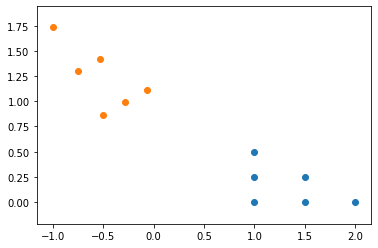

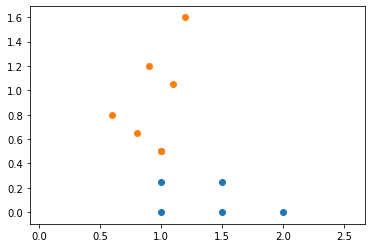

In [5]:
Ref = lambda theta:np.array([[np.cos(2*theta), np.sin(2*theta)], [np.sin(2*theta), -np.cos(2*theta)]])
ref1 = Ref(np.pi/3)  # π/3 radians (60 degree)
ref2 = Ref(np.arctan(0.5))  # π/3 radians (60 degree)

# create a list of 2-D points
points = np.array([[1, 0],
                   [1.5, 0],
                   [2, 0],
                   [1, 0.25],
                   [1.5, 0.25],
                   [1, 0.5]])

rpoints = np.array([ref1 @ p for p in points])
fig, ax = plt.subplots()
ax.scatter([c[0] for c in points], [c[1] for c in points])
ax.scatter([c[0] for c in rpoints],[c[1] for c in rpoints])
ax.set_aspect('equal', 'datalim')
plt.show()


rpoints = np.array([ref2 @ p for p in points])
fig, ax = plt.subplots()
ax.scatter([c[0] for c in points], [c[1] for c in points])
ax.scatter([c[0] for c in rpoints],[c[1] for c in rpoints])
ax.set_aspect('equal', 'datalim')
plt.show()

# 7.2 Selectors

An m × n selector matrix $A$ is one in which each row is a unit vector (transposed):
$$
A =\begin{bmatrix} e^{T}_{k_1} \\ \vdots \\ e^{T}_{k_m} \end{bmatrix}
$$,
where $k_1, \ldots , k_m$ are integers in the range $1,\ldots,n$.

When it multiplies a vector, itsimply copies the $k_i$th entry of $x$ into the $i$th entry of $y = Ax$:
$$
y = (x_{k_1}, x_{k_2},\ldots, x_{k_m})
$$

## Reverser matrix

In [6]:
reverser = lambda n: np.flip(np.eye(n), axis=0)
A = reverser(5)
A

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [7]:
x = np.arange(5, dtype=np.float)
print(A @ x)
print(np.flip(x))

[4. 3. 2. 1. 0.]
[4. 3. 2. 1. 0.]


## Permutation matrix

In [8]:
A = np.array([[0, 0, 1],
              [1, 0, 0],
              [0, 1, 0]])
x = np.array([0.2, -1.7, 2.4])
A @ x  # Permutes entries of x to [x[2], x[0], x[1]]

array([ 2.4,  0.2, -1.7])

In [9]:
x[[2,0,1]]

array([ 2.4,  0.2, -1.7])

## 7.3 Incidence matrix

## Incidence matrix of a graph

- graph with n vertices or nodes, m (directed) edges or links
- incidence matrix is n × m matrix
$$
A_{ij} = \begin{cases}
\begin{array} \\
1  &\quad \text{edge $j$ points to node $i$} \\
-1 &\quad \text{edge $j$ points from node $i$} \\
0 &\quad \text{otherwise}
\end{array}
\end{cases}
$$

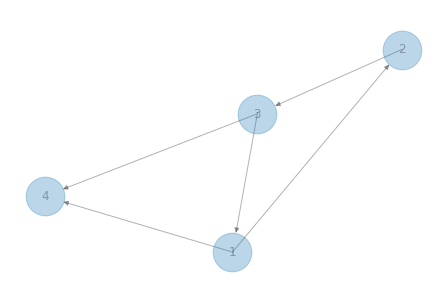

In [10]:
G = nx.DiGraph (
    [(1, 2),
     (1, 4),
     (2, 3),
     (3, 1),
     (3, 4)]
)
nx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)

In [11]:
# incidence matrix of the above graph
A = np.array([[-1, -1, 0, 1, 0],
              [1, 0, -1, 0, 0],
              [0, 0, 1, -1, -1],
              [0, 1, 0, 0, 1]])

***Flow conservation***
- m-vector $x$ gives flows (of something) along the edges
- examples: heat, money, power, mass, people, . . .
- $x_j > 0$ means flow follows edge direction
- $Ax$ is n-vector that gives the total or **net flows**
- $(Ax)_i$ is the net flow into node $i$ (sometimes called the flow surplus at node $i$)
- $Ax = 0$ is **flow conservation**; $x$ is called a **circulation**

In [12]:
xcirc = np.array([1, -1, 1, 0, 1])  # A circulation

In [13]:
A @ xcirc

array([0, 0, 0, 0])

In [14]:
# From: https://scipy-cookbook.readthedocs.io/items/RankNullspace.html
def nullspace(A, atol=1e-13, rtol=0):
    """Compute an approximate basis for the nullspace of A.

    The algorithm used by this function is based on the singular value
    decomposition of `A`.

    Parameters
    ----------
    A : ndarray
        A should be at most 2-D.  A 1-D array with length k will be treated
        as a 2-D with shape (1, k)
    atol : float
        The absolute tolerance for a zero singular value.  Singular values
        smaller than `atol` are considered to be zero.
    rtol : float
        The relative tolerance.  Singular values less than rtol*smax are
        considered to be zero, where smax is the largest singular value.

    If both `atol` and `rtol` are positive, the combined tolerance is the
    maximum of the two; that is::
        tol = max(atol, rtol * smax)
    Singular values smaller than `tol` are considered to be zero.

    Return value
    ------------
    ns : ndarray
        If `A` is an array with shape (m, k), then `ns` will be an array
        with shape (k, n), where n is the estimated dimension of the
        nullspace of `A`.  The columns of `ns` are a basis for the
        nullspace; each element in numpy.dot(A, ns) will be approximately
        zero.
    """

    A = np.atleast_2d(A)
    u, s, vh = np.linalg.svd(A)
    tol = max(atol, rtol * s[0])
    nnz = (s >= tol).sum()
    ns = vh[nnz:].conj().T
    return ns

# linear combination of the basis of nullspace is 'circulation'
ns = nullspace(A)
A @ (10*ns[:, 0] + 5*ns[:, 1])

array([ 0.00000000e+00, -1.77635684e-15,  4.44089210e-16,  8.88178420e-16])

## Potentials and Dirichlet energy

- suppose v is an n-vector, called a **potential**
- $v_i$ is potential value at **node** $i$
- $u = A^Tv$ is an m-vector of potential differences across the $m$ edges
- $u_j = v_l − v_k$, where edge $j$ goes from $k$ to node $l$
- Dirichlet energy is $\mathcal{D}(v) = \left\|A^Tv\right\|^2$,
$$
\mathcal{D}(v) = \sum_{edges(k,l)} (v_l − v_k)^2
$$
(sum of squares of potential differences across the edges)
- $\mathcal{D}(v)$ is small when potential values of neighboring nodes are similar

In [15]:
A = np.array([[-1, -1, 0, 1, 0],
              [1, 0, -1, 0, 0],
              [0, 0, 1, -1, -1],
              [0, 1, 0, 0, 1]])
vsmooth = np.array([1, 2, 2, 1])
np.linalg.norm(A.T @ vsmooth)**2  # Dirichlet energy of vsmooth

2.9999999999999996

In [16]:
vrough = np.array([1, -1, 2, -1])
np.linalg.norm(A.T @ vrough)**2 # Dirichlet energy of vrough

27.0

# 7.4 Convolution

The convolution of an n-vector a and an m-vector b is the (n + m − 1)-vector
denoted c = a ∗ b, with entries
$$
c_{k} =\sum_{i+j=k+1}a_{i}b_{j} , \ k = 1, . . . , n + m − 1,
$$
where the subscript in the sum means that we should sum over all values of i and j in their index ranges 1, . . . , n and 1, . . . , m, for which the sum i + j is k + 1.

For example with n = 4, m = 3, we have
$$
\begin{align*}
c_1 &= a_1b_1 \\
c_2 &= a_1b_2 + a_2b_1 \\
c_3 &= a_1b_3 + a_2b_2 + a_3b_1 \\
c_4 &= a_2b_3 + a_3b_2 + a_4b_1 \\
c_5 &= a_3b_3 + a_4b_2 \\
c_6 &= a_4b_3
\end{align*}
$$

**Properties of convolution**
$$
a ∗ b = b ∗ a \\
(a ∗ b) ∗ c = a ∗ (b ∗ c) \\
a ∗ b = 0 \ \text{only if} \ a = 0 \ \text{or} \ b = 0
$$

Find the coefficients of the polynomial

$p(x) = (1 + x)(2 − x + x^2)(1 + x − 2x^2) = 2 + 3^x − 3x^2 − x^3 + x^4 − 2x^5$

In [18]:
a = np.array([1, 1]) # coefficients of 1+x
b = np.array([2, -1, 1]) # coefficients of 2-x+x^2
c = np.array([1, 1, -2]) # coefficients of 1+x-2x^2
d = np.convolve(np.convolve(a, b), c) # coefficients of product
d

array([ 2,  3, -3, -1,  1, -2])

*Toeplitz matrices*

A basic property is that for fixed a, the convolution a ∗ b is a linear function
of b; and for fixed b, it is a linear function of a. This means we can express a ∗ b as
a matrix-vector product
$$
a ∗ b = T(b)a = T(a)b
$$
where T(b) is the (n + m − 1) × n matrix with entries
$$
T(b)_{ij} =\begin{cases}
b_{i−j+1} \quad 1 ≤ i − j + 1 ≤ m \\
0 \quad text{otherwise}
\end{cases}
$$
and similarly for T(a). 

The matrices T(b) and T(a) are called Toeplitz matrices (named after the mathematician Otto Toeplitz), which means the entries on any diagonal (i.e., indices with i − j constant) are the same.

In [21]:
b = np.array([-1, 2, 3])
a = np.array([-2, 3, -1, 1])

def toeplitz(b, n):
    m = len(b)
    T = np.zeros((n+m-1, n))
    for j in range(n):
        T[j:j+m, j] = b
    return T
Tb = toeplitz(b, len(a))
Tb

array([[-1.,  0.,  0.,  0.],
       [ 2., -1.,  0.,  0.],
       [ 3.,  2., -1.,  0.],
       [ 0.,  3.,  2., -1.],
       [ 0.,  0.,  3.,  2.],
       [ 0.,  0.,  0.,  3.]])

In [22]:
Ta = toeplitz(a, len(b))
Ta

array([[-2.,  0.,  0.],
       [ 3., -2.,  0.],
       [-1.,  3., -2.],
       [ 1., -1.,  3.],
       [ 0.,  1., -1.],
       [ 0.,  0.,  1.]])

In [25]:
print(Ta @ b)
print(Tb @ a)
print(np.convolve(b, a))

[ 2. -7.  1.  6. -1.  3.]
[ 2. -7.  1.  6. -1.  3.]
[ 2 -7  1  6 -1  3]


Compare the time of convolution using `np.conv` and `Toeplitz`

In [27]:
m = 2000
n = 2000
b = np.random.normal(size = n)
a = np.random.normal(size = m)

In [28]:
%timeit ctoep = toeplitz(b, n) @ a

53.5 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
%timeit cconv = np.convolve(a,b)

585 µs ± 16.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
